In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler 

import seaborn as sns
import os 
import math

In [60]:
basepath='./enexis'

def loaddata(service_prov,folder):
    l1=[]
    subfolder=os.path.join(basepath,service_prov,folder)
    print(subfolder)
    for file in os.listdir(subfolder): 
        filedf=pd.read_csv(os.path.join(subfolder,file))
     #   print(file)
        year=file.split('.')[0][-4:]
        filedf['year']=int(year)
        filedf['year'].astype('int64')
        l1.append(filedf)
    dflist=pd.concat(l1)
    return dflist 

In [61]:
df_enexis_gas_train=loaddata('gas1','train')
df_enexis_gas_test=loaddata('gas1','test')

./enexis\gas1\train
./enexis\gas1\test


In [62]:
df_enexis_train=loaddata('elect','train')
df_enexis_test=loaddata('elect','test')
df_enexis_train

./enexis\elect\train
./enexis\elect\test


,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,16,100,NaN,NaN,4282,25,0.0,2010
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100,11,100,NaN,NaN,5113,10,0.0,2010
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,30,100,NaN,NaN,4809,34,0.0,2010
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100,21,100,NaN,NaN,5015,44,0.0,2010
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100,12,100,NaN,NaN,3074,22,0.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115571,Enexis B.V.,ENEXIS,'t-Lage eind,9998XA,9998XA,ROTTUM GN,64,14,100,43.0,3X25,2848,47,50.0,2017
115572,Enexis B.V.,ENEXIS,Jacob Tilbusscherweg,9998XB,9998XB,ROTTUM GN,81,21,100,52.0,3X25,7428,57,33.0,2017
115573,Enexis B.V.,ENEXIS,Kloosterweg,9998XC,9998XD,ROTTUM GN,71,21,100,57.0,3X25,2517,37,19.0,2017
115574,Enexis B.V.,ENEXIS,Stitswerderweg,9998XE,9999XJ,STITSWERD,55,29,100,59.0,3X25,11330,46,34.0,2017


In [63]:
df_enexis_test

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
0,Enexis B.V.,ENEXIS,Sasdijk,4251AA,4251AA,WERKENDAM,42,100.00,100,50.00,3x25,5860.21,28.31,7.14,2018
1,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,17,100.00,100,41.18,1x25,4149.24,28.33,29.41,2018
2,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,11,81.82,100,63.64,1x25,2389.27,34.60,36.36,2018
3,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,29,100.00,100,41.38,3x25,3866.21,32.11,17.24,2018
4,Enexis B.V.,ENEXIS,Heuveltje,4251AE,4251AG,WERKENDAM,21,90.48,100,42.86,1x25,4416.52,57.26,33.33,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124581,Enexis B.V.,ENEXIS,Jacob Tilbusscherweg,9998XB,9998XB,ROTTUM GN,21,76.19,100,57.14,3x25,7034.57,47.49,76.19,2019
124582,Enexis B.V.,ENEXIS,Jan Boerweg,9998XC,9998XD,ROTTUM GN,20,60.00,100,55.00,3x25,2170.80,41.79,55.00,2019
124583,Enexis B.V.,ENEXIS,Knolweg,9998XE,9999XG,ROTTUM GN,13,23.08,100,53.85,3x25,10193.92,51.67,100.00,2019
124584,Enexis B.V.,ENEXIS,Stitswerderweg,9999XH,9999XJ,STITSWERD,16,56.25,100,62.50,3x25,6795.38,39.54,68.75,2019


In [64]:
df_enexis_train.describe()

,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
count,892653.000000,892653.000000,892653.0,785141.000000,892653.000000,892653.000000,892653.000000,892653.000000
mean,97.643127,21.976149,100.0,70.088122,4768.675314,35.028916,12.866437,2013.545245
std,5.961693,12.141144,0.0,19.434092,3588.435082,16.836797,22.833050,2.284633
min,0.000000,10.000000,100.0,3.000000,53.000000,0.000000,0.000000,2010.000000
25%,100.000000,15.000000,100.0,54.000000,3000.000000,22.000000,0.000000,2012.000000
50%,100.000000,19.000000,100.0,69.000000,3767.000000,36.000000,4.000000,2014.000000
75%,100.000000,25.000000,100.0,88.000000,4987.000000,48.000000,14.000000,2016.000000
max,100.000000,625.000000,100.0,100.000000,73043.000000,100.000000,100.000000,2017.000000


In [65]:
df_enexis_test.describe()

,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
count,248749.000000,248167.000000,248749.0,248749.000000,248749.000000,248749.000000,248749.000000,248749.00000
mean,21.263587,90.107759,100.0,67.999099,4534.545448,42.769361,58.357102,2018.50085
std,12.421645,12.839483,0.0,19.134440,3877.432860,12.751319,32.668096,0.50000
min,10.000000,1.090000,100.0,0.000000,60.920000,0.000000,0.000000,2018.00000
25%,14.000000,85.000000,100.0,52.630000,2725.200000,36.360000,26.090000,2018.00000
50%,19.000000,93.750000,100.0,66.670000,3387.640000,46.400000,68.420000,2019.00000
75%,24.000000,100.000000,100.0,84.000000,4580.060000,51.960000,88.890000,2019.00000
max,631.000000,100.000000,100.0,100.000000,66823.000000,88.190000,100.000000,2019.00000


In [66]:
df_enexis_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892653 entries, 0 to 115575
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   net_manager                   892653 non-null  object 
 1   purchase_area                 892653 non-null  object 
 2   street                        892653 non-null  object 
 3   zipcode_from                  892653 non-null  object 
 4   zipcode_to                    892653 non-null  object 
 5   city                          892653 non-null  object 
 6   delivery_perc                 892653 non-null  int64  
 7   num_connections               892653 non-null  int64  
 8   perc_of_active_connections    892653 non-null  int64  
 9   type_conn_perc                785141 non-null  float64
 10  type_of_connection            785072 non-null  object 
 11  annual_consume                892653 non-null  int64  
 12  annual_consume_lowtarif_perc  892653 non-nul

In [67]:
df_enexis_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248749 entries, 0 to 124585
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   net_manager                   248749 non-null  object 
 1   purchase_area                 248749 non-null  object 
 2   street                        248749 non-null  object 
 3   zipcode_from                  248749 non-null  object 
 4   zipcode_to                    248749 non-null  object 
 5   city                          248749 non-null  object 
 6   num_connections               248749 non-null  int64  
 7   delivery_perc                 248167 non-null  float64
 8   perc_of_active_connections    248749 non-null  int64  
 9   type_conn_perc                248749 non-null  float64
 10  type_of_connection            248749 non-null  object 
 11  annual_consume                248749 non-null  float64
 12  annual_consume_lowtarif_perc  248749 non-nul

In [68]:
df_enexis_train.isnull().sum()

net_manager                          0
purchase_area                        0
street                               0
zipcode_from                         0
zipcode_to                           0
city                                 0
delivery_perc                        0
num_connections                      0
perc_of_active_connections           0
type_conn_perc                  107512
type_of_connection              107581
annual_consume                       0
annual_consume_lowtarif_perc         0
smartmeter_perc                      0
year                                 0
dtype: int64

In [69]:
df_enexis_test.isnull().sum()

net_manager                       0
purchase_area                     0
street                            0
zipcode_from                      0
zipcode_to                        0
city                              0
num_connections                   0
delivery_perc                   582
perc_of_active_connections        0
type_conn_perc                    0
type_of_connection                0
annual_consume                    0
annual_consume_lowtarif_perc      0
smartmeter_perc                   0
year                              0
dtype: int64

In [70]:
df_enexis_train.type_of_connection.unique()

array([nan, '1X25', '3X25', '1X35', '3X35', '3X63', '1X40', '3X80',
       '3X50', '1X20', '3X40', '1x25', '3x25', '1x35', '1x40', '3x35',
       '3x63', '3x80', '3x50', '3x40', '1x20'], dtype=object)

In [71]:
df_enexis_train[df_enexis_train.isnull().type_of_connection==True]

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,100,16,100,NaN,NaN,4282,25,0.0,2010
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,100,11,100,NaN,NaN,5113,10,0.0,2010
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,100,30,100,NaN,NaN,4809,34,0.0,2010
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,100,21,100,NaN,NaN,5015,44,0.0,2010
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,100,12,100,NaN,NaN,3074,22,0.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96074,Enexis B.V.,ENEXIS,Ertsstraat,8263BM,8263BN,KAMPEN,86,21,100,29.0,NaN,21348,24,38.0,2017
96079,Enexis B.V.,ENEXIS,Zambonistraat,8263CC,8263CE,KAMPEN,100,15,100,73.0,NaN,50923,28,80.0,2017
99746,Enexis B.V.,ENEXIS,Middenweg,9404LL,9404LL,ASSEN,93,15,100,80.0,NaN,53105,42,100.0,2017
109096,Enexis B.V.,ENEXIS,Wasaweg,9723JD,9723JD,GRONINGEN,96,28,100,32.0,NaN,27448,27,14.0,2017


In [72]:
df_enexis_train['type_of_connection']=df_enexis_train['type_of_connection'].str.replace('x','X')
df_enexis_test['type_of_connection']=df_enexis_test['type_of_connection'].str.replace('x','X')

In [73]:
df_enexis_train['type_of_connection'].value_counts()

1X35    313126
3X25    236638
1X25    198178
1X40     30242
1X20      4660
3X35      1013
3X80       372
3X63       327
3X40       259
3X50       257
Name: type_of_connection, dtype: int64

In [74]:
df_enexis_test['type_of_connection'].value_counts()

1X35    99092
3X25    85405
1X25    50096
1X40    12391
1X20      704
3X35      377
3X80      295
3X63      154
3X40      125
3X50      110
Name: type_of_connection, dtype: int64

In [75]:
df_enexis_train['type_of_connection'].fillna('1X35',inplace=True)
df_enexis_test['type_of_connection'].fillna('1X35',inplace=True)


In [76]:
df_enexis_train.isnull().sum()

net_manager                          0
purchase_area                        0
street                               0
zipcode_from                         0
zipcode_to                           0
city                                 0
delivery_perc                        0
num_connections                      0
perc_of_active_connections           0
type_conn_perc                  107512
type_of_connection                   0
annual_consume                       0
annual_consume_lowtarif_perc         0
smartmeter_perc                      0
year                                 0
dtype: int64

In [77]:
val=df_enexis_train[df_enexis_train['type_of_connection']=='1X35']['type_conn_perc'].mode()
df_enexis_train['type_conn_perc'].fillna(value=100,inplace=True)
df_enexis_test['type_conn_perc'].fillna(value=100,inplace=True)

In [78]:
df_enexis_train.isnull().sum()

net_manager                     0
purchase_area                   0
street                          0
zipcode_from                    0
zipcode_to                      0
city                            0
delivery_perc                   0
num_connections                 0
perc_of_active_connections      0
type_conn_perc                  0
type_of_connection              0
annual_consume                  0
annual_consume_lowtarif_perc    0
smartmeter_perc                 0
year                            0
dtype: int64

In [79]:
df_enexis_test.isnull().sum()

net_manager                       0
purchase_area                     0
street                            0
zipcode_from                      0
zipcode_to                        0
city                              0
num_connections                   0
delivery_perc                   582
perc_of_active_connections        0
type_conn_perc                    0
type_of_connection                0
annual_consume                    0
annual_consume_lowtarif_perc      0
smartmeter_perc                   0
year                              0
dtype: int64

In [80]:
df_enexis_test.dropna(inplace=True)

In [81]:
df_total=np.vstack((df_enexis_train,df_enexis_test))
df_total=pd.DataFrame(df_total)
df_total.columns=df_enexis_test.columns

In [82]:
df_total_gas=np.vstack((df_enexis_gas_train,df_enexis_gas_test))
df_total_gas=pd.DataFrame(df_total_gas)
df_total_gas.columns=df_enexis_gas_test.columns

In [83]:
df_total=df_total.convert_dtypes()
df_total.dtypes

net_manager                      string
purchase_area                    string
street                           string
zipcode_from                     string
zipcode_to                       string
city                             string
num_connections                   Int64
delivery_perc                   float64
perc_of_active_connections        Int64
type_conn_perc                  float64
type_of_connection               string
annual_consume                  float64
annual_consume_lowtarif_perc    float64
smartmeter_perc                 float64
year                              Int64
dtype: object

## Numeric variables are plotted as boxplot . Outliers are identified

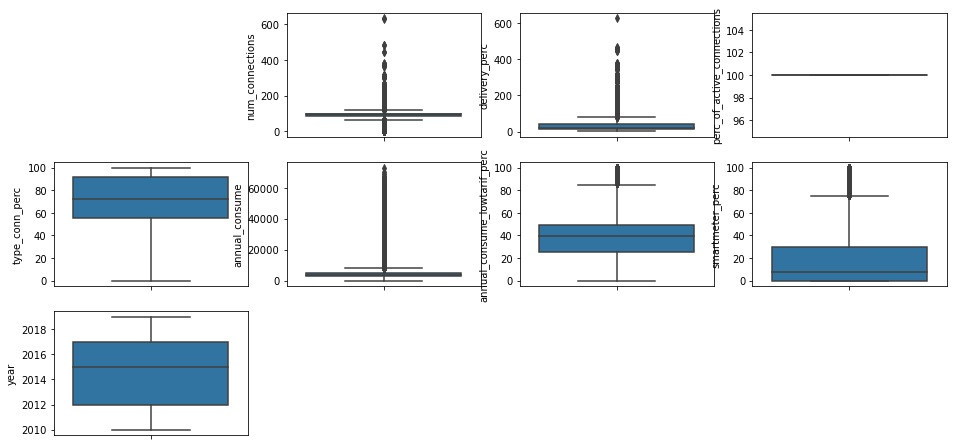

In [84]:
cols=[col for col in df_enexis_test.select_dtypes(exclude=['object']).copy()]
fig = plt.figure(figsize=(16,16))
index=1
for col  in cols :
    
    plt.subplot(6,4,index+1)
    index+=1
    sns.boxplot(data=df_total,y=col)


In [85]:
cols

['num_connections',
 'delivery_perc',
 'perc_of_active_connections',
 'type_conn_perc',
 'annual_consume',
 'annual_consume_lowtarif_perc',
 'smartmeter_perc',
 'year']

In [86]:
df_total.perc_of_active_connections.unique()

<IntegerArray>
[100]
Length: 1, dtype: Int64

### Only a single value for perc_of_active_connections and hence can be removed

In [87]:
df_total.describe().T

,count,mean,std,min,25%,50%,75%,max
num_connections,1140820.0,81.029230,32.469391,0.00,86.0,100.0,100.0,631.0
delivery_perc,1140820.0,36.797082,30.680887,1.09,16.0,22.0,43.0,625.0
perc_of_active_connections,1140820.0,100.000000,0.000000,100.00,100.0,100.0,100.0,100.0
type_conn_perc,1140820.0,72.442757,20.473867,0.00,55.0,72.0,92.0,100.0
annual_consume,1140820.0,4718.827313,3655.139591,53.00,2932.0,3686.0,4916.0,73043.0
annual_consume_lowtarif_perc,1140820.0,36.706840,16.349286,0.00,25.0,39.0,49.0,100.0
smartmeter_perc,1140820.0,22.743482,31.476779,0.00,0.0,8.0,30.0,100.0
year,1140820.0,2014.623158,2.884064,2010.00,2012.0,2015.0,2017.0,2019.0


In [88]:
df_total.type_conn_perc.unique()

array([100.  ,  50.  ,  64.  , ...,  95.4 ,  49.15,  28.07])

In [89]:
df_total[((df_total['annual_consume'] > 20000) == True)]

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
136,Enexis B.V.,ENEXIS,Bruningsstraat,4251LA,4251LA,WERKENDAM,100,13.00,100,100.00,1X35,24121.00,37.00,0.00,2010
137,Enexis B.V.,ENEXIS,Weerenweg,4251LB,4251LC,WERKENDAM,100,41.00,100,100.00,1X35,23127.00,44.00,0.00,2010
320,Enexis B.V.,ENEXIS,De Hoogjens,4254XV,4254XV,SLEEUWIJK,100,20.00,100,100.00,1X35,21508.00,32.00,0.00,2010
739,Enexis B.V.,ENEXIS,Middenweg,4281KH,4281KH,ANDEL,100,19.00,100,100.00,1X35,20201.00,54.00,0.00,2010
1138,Enexis B.V.,ENEXIS,Voetboog,4611MJ,4611MJ,BERGEN OP ZOOM,100,19.00,100,100.00,1X35,22936.00,6.00,0.00,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140340,Enexis B.V.,ENEXIS,Westlob,9979XJ,9979XL,EEMSHAVEN,12,100.00,100,41.67,3X80,26402.33,37.58,41.67,2019
1140472,Enexis B.V.,ENEXIS,Eemsweg,9981TN,9981TP,UITHUIZEN,12,91.67,100,58.33,3X25,20542.75,49.23,58.33,2019
1140554,Enexis B.V.,ENEXIS,Dwarsweg,9982TW,9982TW,UITHUIZERMEEDEN,31,74.19,100,64.52,3X25,22172.84,47.92,48.39,2019
1140708,Enexis B.V.,ENEXIS,Kloosterweg,9989TB,9989TB,WARFFUM,10,70.00,100,30.00,3X50,20318.50,46.52,90.00,2019


In [90]:
df_total.num_connections.describe().T

count    1.140820e+06
mean     8.102923e+01
std      3.246939e+01
min      0.000000e+00
25%      8.600000e+01
50%      1.000000e+02
75%      1.000000e+02
max      6.310000e+02
Name: num_connections, dtype: float64

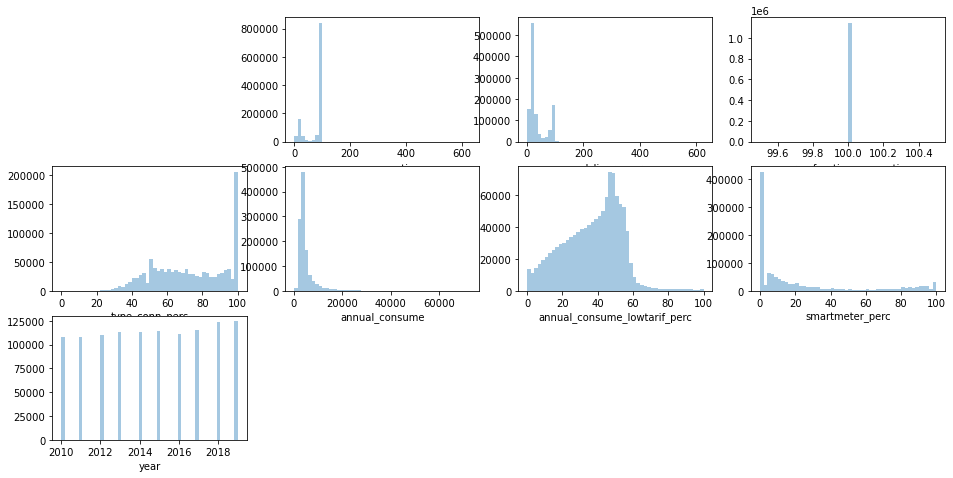

In [91]:
#cols=[col for col in df_enexis_test.select_dtypes(exclude=['object']).copy()]
fig = plt.figure(figsize=(16,16))
index=1
for col  in cols :
    
    plt.subplot(6,4,index+1)
    index+=1
    sns.distplot(df_total[col],kde=False)


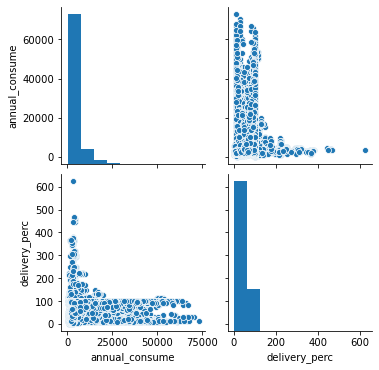

In [92]:
sns.pairplot(df_total,vars=['annual_consume','delivery_perc'])
#df_total[:1000]

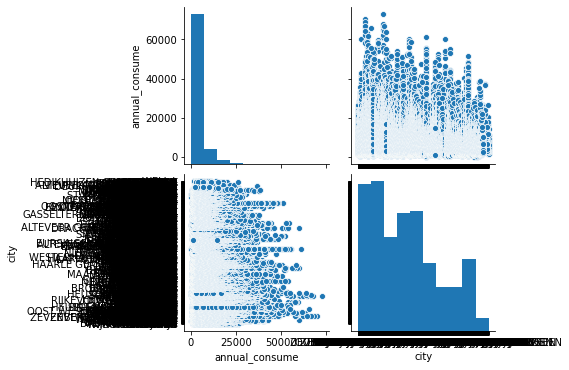

In [93]:
sns.pairplot(df_total,vars=['annual_consume','city'])


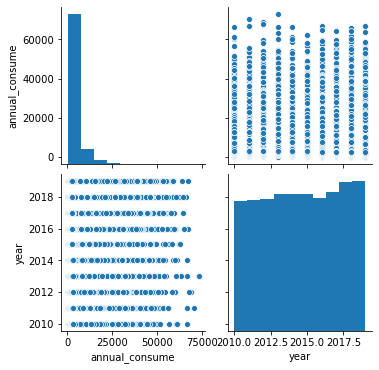

In [94]:
sns.pairplot(df_total,vars=['annual_consume','year'])


num_connections                 0.013209
delivery_perc                  -0.026135
perc_of_active_connections           NaN
type_conn_perc                 -0.257307
annual_consume                  1.000000
annual_consume_lowtarif_perc    0.141767
smartmeter_perc                -0.036682
year                           -0.044923
Name: annual_consume, dtype: float64

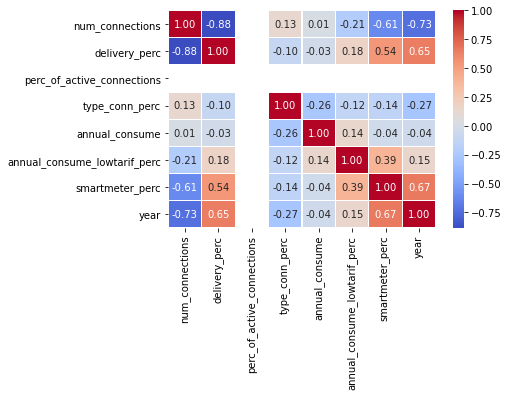

In [95]:
corrval=df_total.corr()
fig,ax=plt.subplots()
sns.heatmap(corrval,cmap="coolwarm",ax=ax,fmt='.2f',annot=True,linewidths=.05)
corrval.annual_consume

In [96]:
print(corrval)

                              num_connections  delivery_perc  \
num_connections                      1.000000      -0.884829   
delivery_perc                       -0.884829       1.000000   
perc_of_active_connections                NaN            NaN   
type_conn_perc                       0.134978      -0.103058   
annual_consume                       0.013209      -0.026135   
annual_consume_lowtarif_perc        -0.207674       0.182694   
smartmeter_perc                     -0.608059       0.537210   
year                                -0.729896       0.653173   

                              perc_of_active_connections  type_conn_perc  \
num_connections                                      NaN        0.134978   
delivery_perc                                        NaN       -0.103058   
perc_of_active_connections                           NaN             NaN   
type_conn_perc                                       NaN        1.000000   
annual_consume                             

## Included the Number of smart meters instead of just using hte smart meter percentage

In [97]:
df_enexis_train['no_of_smart_meter']=df_enexis_train['smartmeter_perc']*df_enexis_train['num_connections']/100
df_enexis_train['no_of_smart_meter']=df_enexis_train['smartmeter_perc']*df_enexis_train['num_connections']/100 
df_enexis_test['no_of_smart_meter']=df_enexis_test['smartmeter_perc']*df_enexis_test['num_connections']/100
df_enexis_test['no_of_smart_meter']=df_enexis_test['smartmeter_perc']*df_enexis_test['num_connections']/100 
df_total['no_of_smart_meter']=df_total['smartmeter_perc']*df_total['num_connections']/100

## Included city as category to see if there is correlation 

In [98]:
uniqueconn=df_total['type_of_connection'].unique()
uniqueconn
categno= np.arange(0,len(uniqueconn))
df_total['typeofconncateg']=df_total['type_of_connection'].replace(to_replace=uniqueconn, value=categno)

In [99]:
df_enexis_test['typeofconncateg']=df_enexis_test['type_of_connection'].replace(to_replace=uniqueconn, value=categno)
df_enexis_train['typeofconncateg']=df_enexis_train['type_of_connection'].replace(to_replace=uniqueconn, value=categno)


In [100]:
df_total['city']=df_total['city'].astype('category')
df_total['city_cat']=df_total['city'].cat.codes
df_enexis_train['city']=df_enexis_train['city'].astype('category')
df_enexis_test['city']=df_enexis_test['city'].astype('category')
df_enexis_train['city_cat']=df_enexis_train['city'].cat.codes
df_enexis_test['city_cat']=df_enexis_test['city'].cat.codes


<AxesSubplot:>

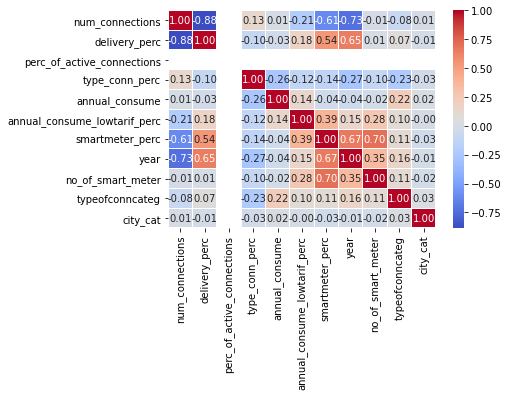

In [101]:
corrval=df_total.corr()
fig,ax=plt.subplots()
sns.heatmap(corrval,cmap="coolwarm",ax=ax,fmt='.2f',annot=True,linewidths=.05)
#corrval['annual_consume']

## Inference from correlation
As seen in the correlation map, the city  has very less correlation with annual consumption . Hence this field is removed. 
The type of connection had a correlation of 0.22 and hence that field is retained. The number of smart meter 

<AxesSubplot:xlabel='typeofconncateg', ylabel='annual_consume'>

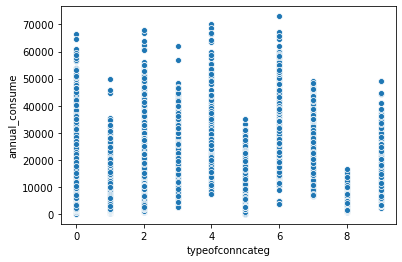

In [102]:
sns.scatterplot(df_total['typeofconncateg'],df_total['annual_consume'])

<AxesSubplot:xlabel='type_conn_perc', ylabel='annual_consume'>

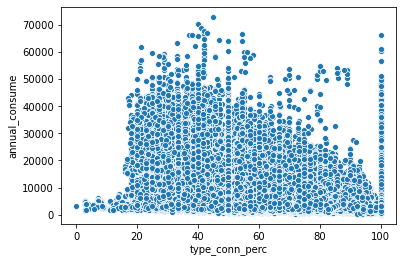

In [103]:
sns.scatterplot(df_total['type_conn_perc'],df_total['annual_consume'])

<AxesSubplot:xlabel='delivery_perc', ylabel='annual_consume'>

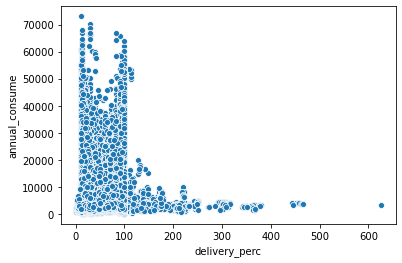

In [104]:
sns.scatterplot(df_total['delivery_perc'],df_total['annual_consume'])

In [105]:
df_enexis_test.drop(columns=['net_manager','street','city'],inplace=True)
df_enexis_test.drop(columns=['type_of_connection','city_cat'],inplace=True)
df_enexis_test.drop(columns=['purchase_area','zipcode_from','zipcode_to'],inplace=True)
df_enexis_train.drop(columns=['net_manager','street','city'],inplace=True)
df_enexis_train.drop(columns=['type_of_connection','city_cat'],inplace=True)
df_enexis_train.drop(columns=['purchase_area','zipcode_from','zipcode_to'],inplace=True)
df_enexis_train.drop(columns=['perc_of_active_connections'],inplace=True)
df_enexis_test.drop(columns=['perc_of_active_connections'],inplace=True)


In [106]:
X_train = df_enexis_train.iloc[:,df_enexis_train.columns != 'annual_consume'].values
Y_train=df_enexis_train.iloc[:,df_enexis_train.columns == 'annual_consume'].values
x_test = df_enexis_test.iloc[:,df_enexis_test.columns != 'annual_consume'].values
y_test=df_enexis_test.iloc[:,df_enexis_test.columns == 'annual_consume'].values


In [107]:
df_enexis_test.columns

Index(['num_connections', 'delivery_perc', 'type_conn_perc', 'annual_consume',
       'annual_consume_lowtarif_perc', 'smartmeter_perc', 'year',
       'no_of_smart_meter', 'typeofconncateg'],
      dtype='object')

In [108]:
X_train.shape

(892653, 8)

In [109]:

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
x_test=sc.transform(x_test)
#x_poly=sc.fit_transform(x_poly)

In [110]:

linrregrmodel=LinearRegression()
linrregrmodel.fit(X_train,Y_train)

ypred=linrregrmodel.predict(X_train)
print("RMSE",math.sqrt(mean_squared_error(ypred,Y_train)))
print("R2 Score",r2_score(ypred,Y_train))
ytest_pred=linrregrmodel.predict(x_test)
print("RMSE for test data",math.sqrt(mean_squared_error(ytest_pred,y_test)))
print("Score",linrregrmodel.score(x_test,y_test))

RMSE 3340.1041401596535
R2 Score -5.484121452494743
RMSE for test data 3648.058716960568
Score 0.11613324557118399


In [111]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, Y_train)

c:\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LassoCV(cv=10, max_iter=100000, normalize=True)

In [112]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.008110136290716816

In [113]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.008110136290716816)

In [114]:
lasso_reg.score(x_test, y_test)

0.11612730803042903

In [115]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, Y_train)
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, Y_train)
ridge_model.score(x_test, y_test)

0.11613324577085882

In [116]:
ypred_ridge=ridge_model.predict(X_train)
print("RMSE is",math.sqrt(mean_squared_error(ypred_ridge,Y_train)))

RMSE is 3340.1041401596694


In [117]:
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(X_train, Y_train)
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=elasticCV.l1_ratio)
elasticnet_reg.fit(X_train, Y_train)
elasticnet_reg.score(x_test, y_test)

c:\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.08707609853688536

In [118]:

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
x_test_poly = polynomial_features.fit_transform(x_test)

x_poly.shape


(892653, 45)

In [119]:

sc1=StandardScaler()
x_train_poly=sc1.fit_transform(x_poly)
x_test_poly=sc1.transform(x_test_poly)
#x_poly=sc.fit_transform(x_poly)

In [120]:
polyregr=LinearRegression()
polyregr.fit(x_train_poly,Y_train)

ypred=polyregr.predict(x_train_poly)
print("RMSE",math.sqrt(mean_squared_error(ypred,Y_train)))
print("R2 Score",r2_score(ypred,Y_train))
ytest_pred=polyregr.predict(x_test_poly)
print("RMSE for test data",math.sqrt(mean_squared_error(ytest_pred,y_test)))
print("Score",polyregr.score(x_test_poly,y_test))

RMSE 3178.2664648287773
R2 Score -2.6396840938002666
RMSE for test data 226725846578016.47
Score -3.4140134160641116e+21


In [121]:

regr=RandomForestRegressor()
regr.fit(X_train,Y_train)
ypred=regr.predict(X_train)
print("RMSE",math.sqrt(mean_squared_error(ypred,Y_train)))
print("R2 Score",r2_score(ypred,Y_train))
regr.score(x_test,y_test)
Y_pred=regr.predict(x_test)

c:\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RMSE 1745.410745611098
R2 Score 0.6220634023429318


In [122]:
Y_pred=regr.predict(x_test)
print("RMSE",math.sqrt(mean_squared_error(Y_pred,y_test)))
print("Score is ",regr.score(x_test,y_test))


RMSE 3162.291980828654
Score is  0.3358485999124219


Text(0.5, 1.0, 'Y_pred Vs y_test')

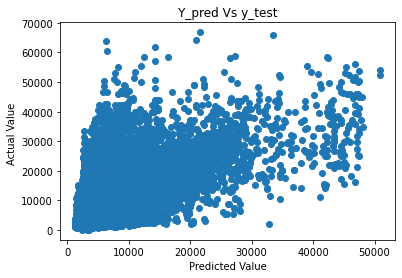

In [123]:
plt.scatter(Y_pred,y_test)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value ")
plt.title("Y_pred Vs y_test")

In [124]:

for i in range(16,40):
    dectree=DecisionTreeRegressor(max_depth=i)
    dectree.fit(X_train,Y_train)
    ytrain_pred=dectree.predict(X_train)
    print(i,np.sqrt(mean_squared_error(ytrain_pred,Y_train)),dectree.score(x_test,y_test))

16 2606.288855570267 0.06250524931507428
17 2557.9502652750725 -0.0359952688103804
18 2505.218699434033 -0.26459966894718057
19 2446.2797908658335 -0.3269910471012303
20 2383.4379719620415 -0.35274152669256087
21 2314.7482668783114 -0.05918300816959432
22 2239.3068453919805 -0.35683494983613984
23 2163.838532427971 -0.3590626829806576
24 2088.1194400360073 -0.09018517559489658
25 2011.8519885581293 -0.34622426600852463
26 1937.0734830954364 -0.39882528237340953
27 1865.5454824364797 -0.2983803562416887
28 1801.9265509668 -0.3960985440343532
29 1745.9751162885318 -0.3169133031726039
30 1698.71409710254 -0.08532141829239004
31 1658.8021835796565 -0.35930143262383174
32 1627.9578872059517 -0.3447328184655407
33 1605.4099246776966 -0.3384024884046135
34 1588.2920043637926 -0.3332925841477494
35 1575.1862004092045 -0.0564500047393135
36 1566.4334342003467 -0.07954912945121695
37 1560.4054900066753 -0.3531250666638772
38 1556.8681540296486 -0.0938711596619688
39 1554.252744751622 -0.31557005

In [125]:

for i in range(16,40):
    dectree=DecisionTreeRegressor(max_depth=i)
    dectree.fit(X_train,Y_train)
    ytrain_pred=dectree.predict(X_train)
    print(i,np.sqrt(mean_squared_error(ytrain_pred,Y_train)),r2_score(ytrain_pred,Y_train))

16 2606.288855570267 -0.11647245812870621
17 2557.9502652750725 -0.03305584504305581
18 2505.218699434033 0.0491779532508162
19 2446.279790587405 0.13177706834785607
20 2383.437967049072 0.2105729512065434
21 2314.7479871817573 0.2873779385584839
22 2239.305801524964 0.36221572735376895
23 2163.8390071855074 0.4286274915177988
24 2088.1194400360077 0.48803065449505634
25 2011.851954671748 0.5415778572131447
26 1937.0740748177443 0.5887756570117975
27 1865.5456350331472 0.6296252152157756
28 1801.9265509793893 0.6628277510072776
29 1745.975191827603 0.6898353365304939
30 1698.714286537422 0.7111834450353274
31 1658.8027328818641 0.7282404691199255
32 1627.9578872059517 0.7408478302917476
33 1605.4099246776966 0.7497608328704788
34 1588.2920043637926 0.756362030770994
35 1575.1862004092045 0.7613219115878339
36 1566.4334342003467 0.764589737330332
37 1560.4054900066753 0.766819726762443
38 1556.8681540296486 0.7681206039500319
39 1554.252744751622 0.7690787799686328


In [126]:
dectreefin=DecisionTreeRegressor(max_depth=15)
dectreefin.fit(X_train,Y_train)
y_pred_train=dectreefin.predict(X_train)
y_pred_dec=dectreefin.predict(x_test)
print("R2 score is ",r2_score(y_pred_train,Y_train))
print("RMSE for testing data ",math.sqrt(mean_squared_error(y_pred_dec,y_test)))
print("Score is ",dectreefin.score(x_test,y_test))
print("R2 score for test data is", r2_score(y_pred_dec,y_test))

R2 score is  -0.1957821937771036
RMSE for testing data  3845.214250514017
Score is  0.01801637602178907
R2 score for test data is -0.566149463898945


In [127]:
df_yearwise_elect=pd.DataFrame(df_total.groupby('year').sum()['annual_consume'])
df_yearwise_elect

,annual_consume
year,
2010,5.265813e+08
2011,5.310414e+08
2012,5.416147e+08
2013,5.549411e+08
2014,5.499293e+08
2015,5.327039e+08
2016,5.052923e+08
2017,5.146683e+08
2018,5.680565e+08


Text(0, 0.5, 'Annual Consumption')

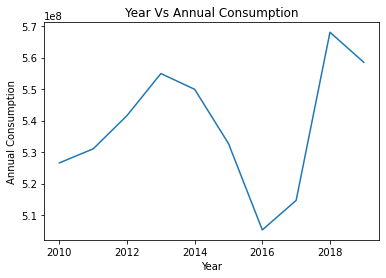

In [128]:
columns=['year','total consume']
plt.subplots()
plt.plot(df_yearwise_elect['annual_consume'])
plt.title('Year Vs Annual Consumption')
plt.xlabel('Year')
plt.ylabel('Annual Consumption')

In [129]:
Y_pred.reshape(-1,1)

array([[3839.42      ],
       [3667.64      ],
       [1799.07      ],
       ...,
       [2617.89083333],
       [5053.32      ],
       [4652.76      ]])

In [130]:
datacomb=pd.DataFrame(np.hstack((df_enexis_test.drop(columns=('annual_consume')),Y_pred.reshape(-1,1))))
#collist=df_enexis_test.columns
collist=['num_connections', 'delivery_perc', 'type_conn_perc',
       'annual_consume_lowtarif_perc', 'smartmeter_perc', 'year',
       'no_of_smart_meter', 'typeofconncateg','annual_consume']
datacomb.columns=collist
df_year_pred_anlcons=pd.DataFrame(datacomb.groupby('year').sum()['annual_consume'])

In [131]:
df_year_actual_anlcons=pd.DataFrame(df_enexis_test.groupby('year').sum()['annual_consume'])
actlist=[]
actlist.append(df_year_actual_anlcons['annual_consume'][2018])
actlist.append(df_year_actual_anlcons['annual_consume'][2019])
yearlst=['2018','2019']
predlist=[]
predlist.append(df_year_pred_anlcons['annual_consume'][2018])
predlist.append(df_year_pred_anlcons['annual_consume'][2019]) 
dmap={'yearlst':yearlst,'act_cons':actlist,'pred_cons': predlist}
df=pd.DataFrame(dmap)
df

,yearlst,act_cons,pred_cons
0,2018,5.680565e+08,5.184901e+08
1,2019,5.585037e+08,5.145268e+08


<Figure size 1152x1152 with 0 Axes>

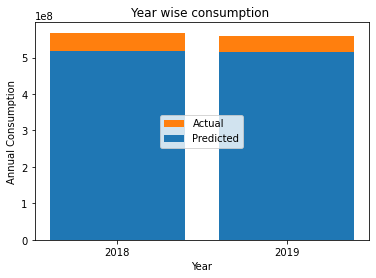

In [132]:
fig = plt.figure(figsize=(16,16))
plt.subplots()
p1=plt.bar(yearlst,actlist,color='tab:orange')
p2=plt.bar(yearlst,predlist,color='tab:blue')
plt.title("Year wise consumption ")
plt.xlabel("Year")
plt.ylabel("Annual Consumption")
plt.legend((p1[0],p2[0]),("Actual","Predicted"),loc='center')


In [133]:
df_yearwise_gas=pd.DataFrame(df_total_gas.groupby('year').sum()['annual_consume'])
df_yearwise_gas

,annual_consume
year,
2010,1.803985e+08
2011,1.817192e+08
2012,1.928442e+08
2013,1.959069e+08
2014,1.906245e+08
2015,1.840054e+08
2016,1.578030e+08
2017,1.906399e+08
2018,2.115056e+08


Text(0, 0.5, 'Annual Consumption')

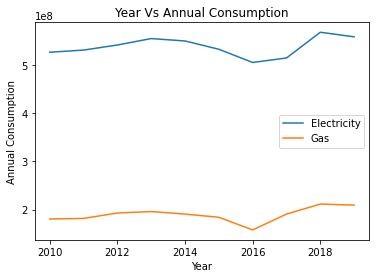

In [134]:
columns=['year','total consume']
plt.plot(df_yearwise_elect['annual_consume'],label='Electricity')
plt.plot(df_yearwise_gas['annual_consume'],label='Gas')
plt.legend()
plt.title('Year Vs Annual Consumption')
plt.xlabel('Year')
plt.ylabel('Annual Consumption')